In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**EDA**

In [2]:
train_df = pd.read_csv('/kaggle/input/f-1-racer-diet-planning/train.csv')

In [3]:
train_df.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
556476,556476,female,55,157.0,61.0,24.0,109.0,40.6,162.0
278952,278952,male,54,184.0,91.0,6.0,85.0,39.2,26.0
381581,381581,male,70,175.0,77.0,4.0,86.0,39.1,18.0
116619,116619,male,62,173.0,80.0,13.0,84.0,40.1,56.0
555005,555005,female,60,157.0,58.0,30.0,102.0,40.9,200.0


In [4]:
print(f"Missing values:\n {train_df.isna().sum()}")

Missing values:
 id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [5]:
print("Some info about data")
train_df.info()
print("Data distribution")
train_df.describe()

Some info about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
Data distribution


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Let's visualize the distribution of some columns**

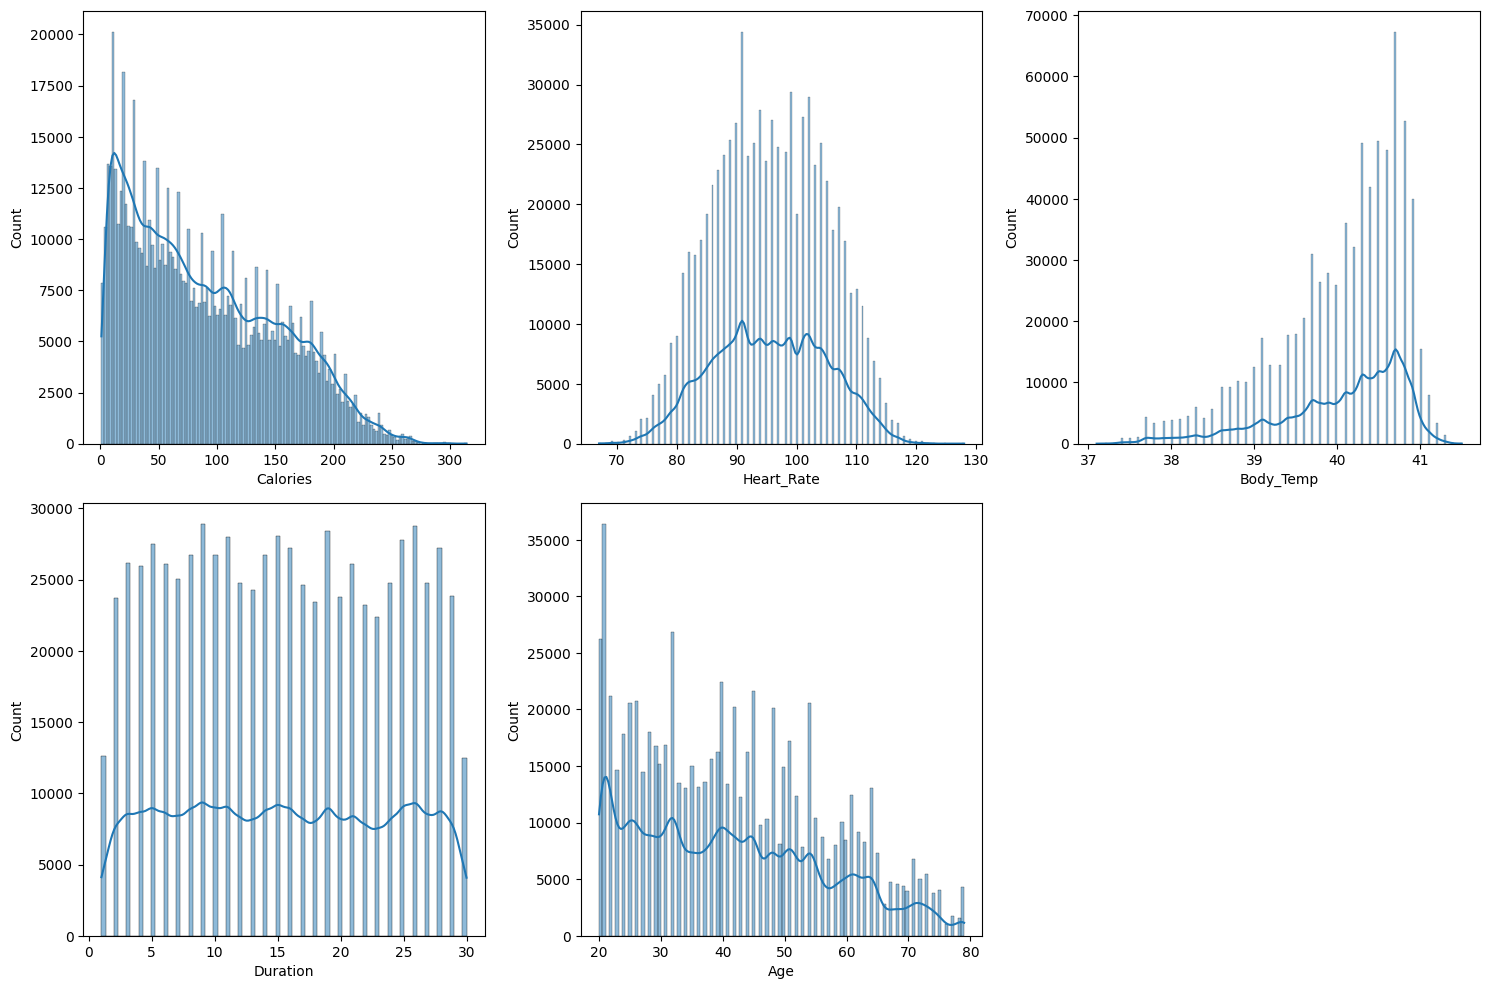

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.histplot(train_df['Calories'], kde=True)

plt.subplot(2, 3, 2)
sns.histplot(train_df['Heart_Rate'], kde=True)

plt.subplot(2, 3, 3)
sns.histplot(train_df['Body_Temp'], kde=True)

plt.subplot(2, 3, 4)
sns.histplot(train_df['Duration'], kde=True)

plt.subplot(2, 3, 5)
sns.histplot(train_df['Age'], kde=True)

plt.tight_layout()
plt.show()

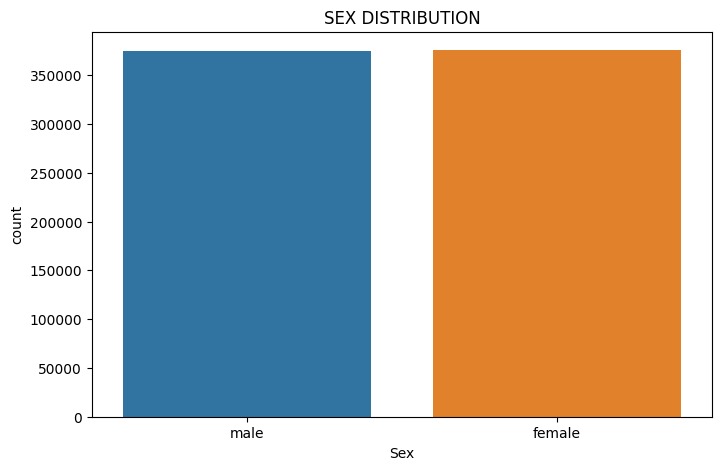

In [7]:
# sex distribution
plt.figure(figsize=(8, 5))

sns.countplot(x='Sex', data=train_df)
plt.title("SEX DISTRIBUTION")
plt.show()

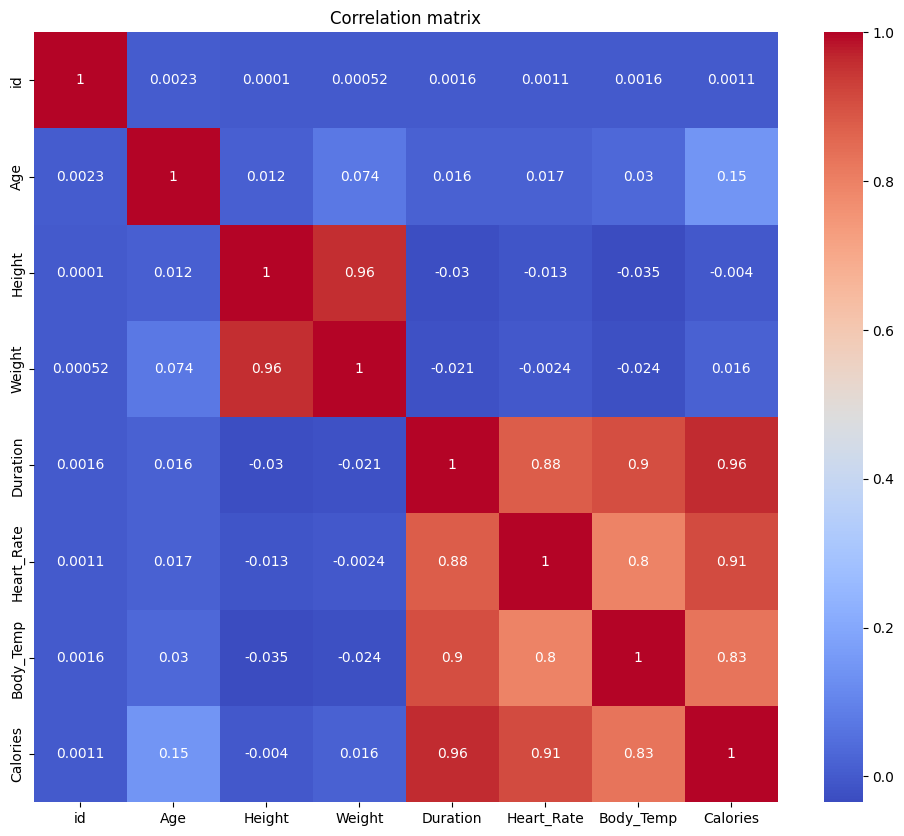

In [8]:
#correlation matrix
plt.figure(figsize=(12,10))
correlation = train_df.drop('Sex',axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

I can see that calories is highly corr with duration, heart_beat and the body temp means they are very usefull for our predictions

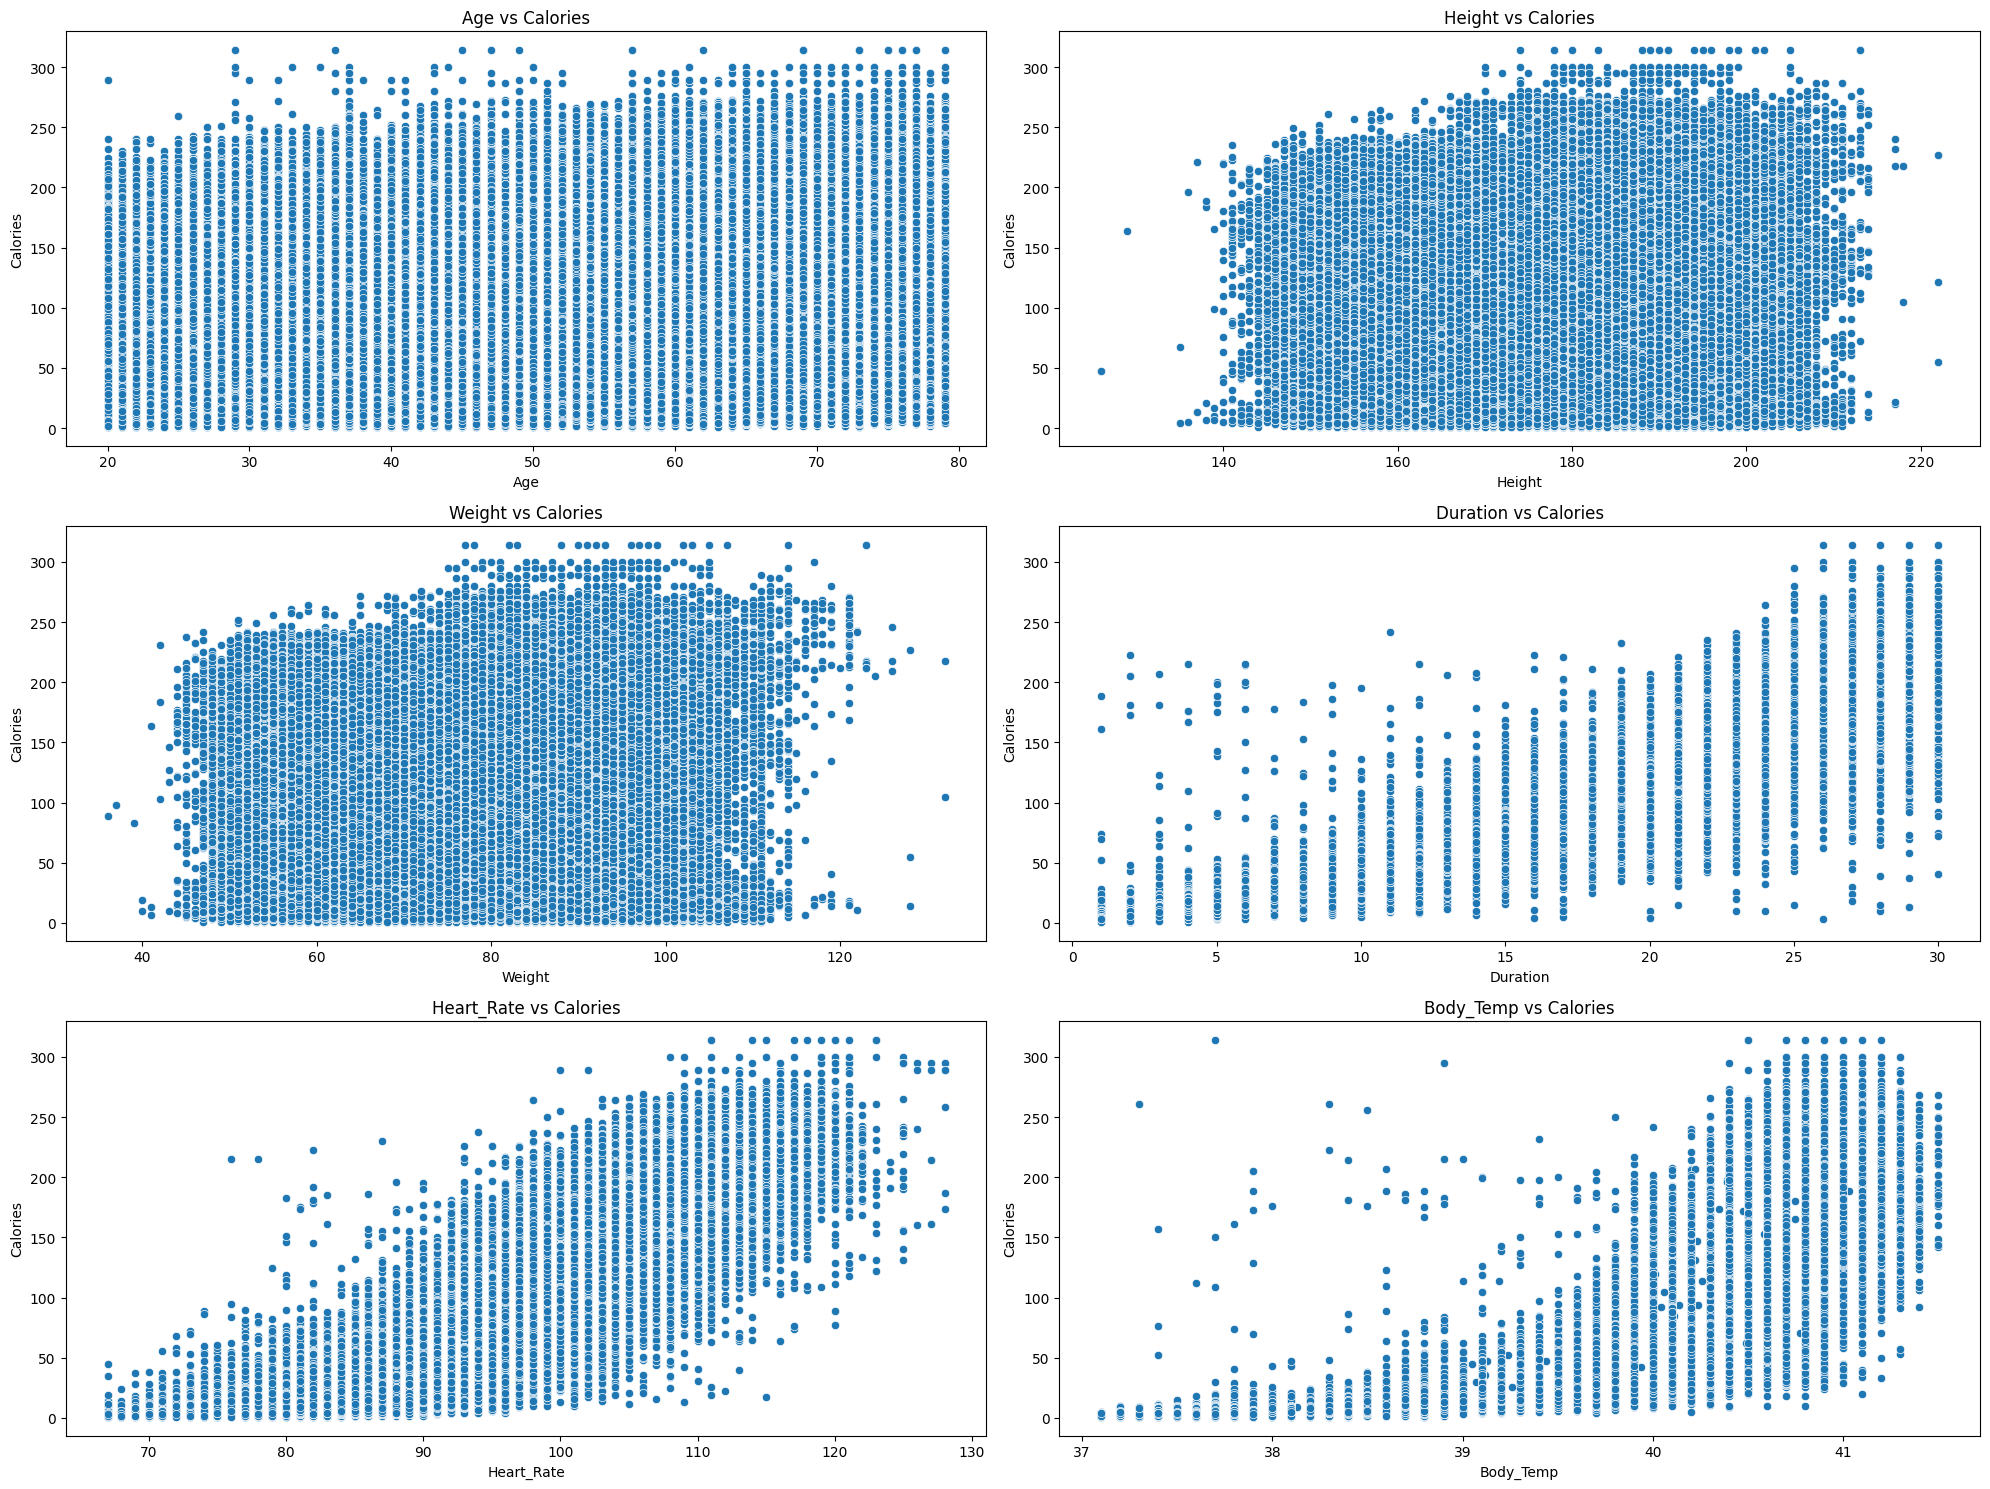

In [9]:
#some relations between features and calories.
plt.figure(figsize=(20, 15))
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=feature, y='Calories', data=train_df)
    plt.title(f'{feature} vs Calories')
plt.tight_layout()
plt.show()

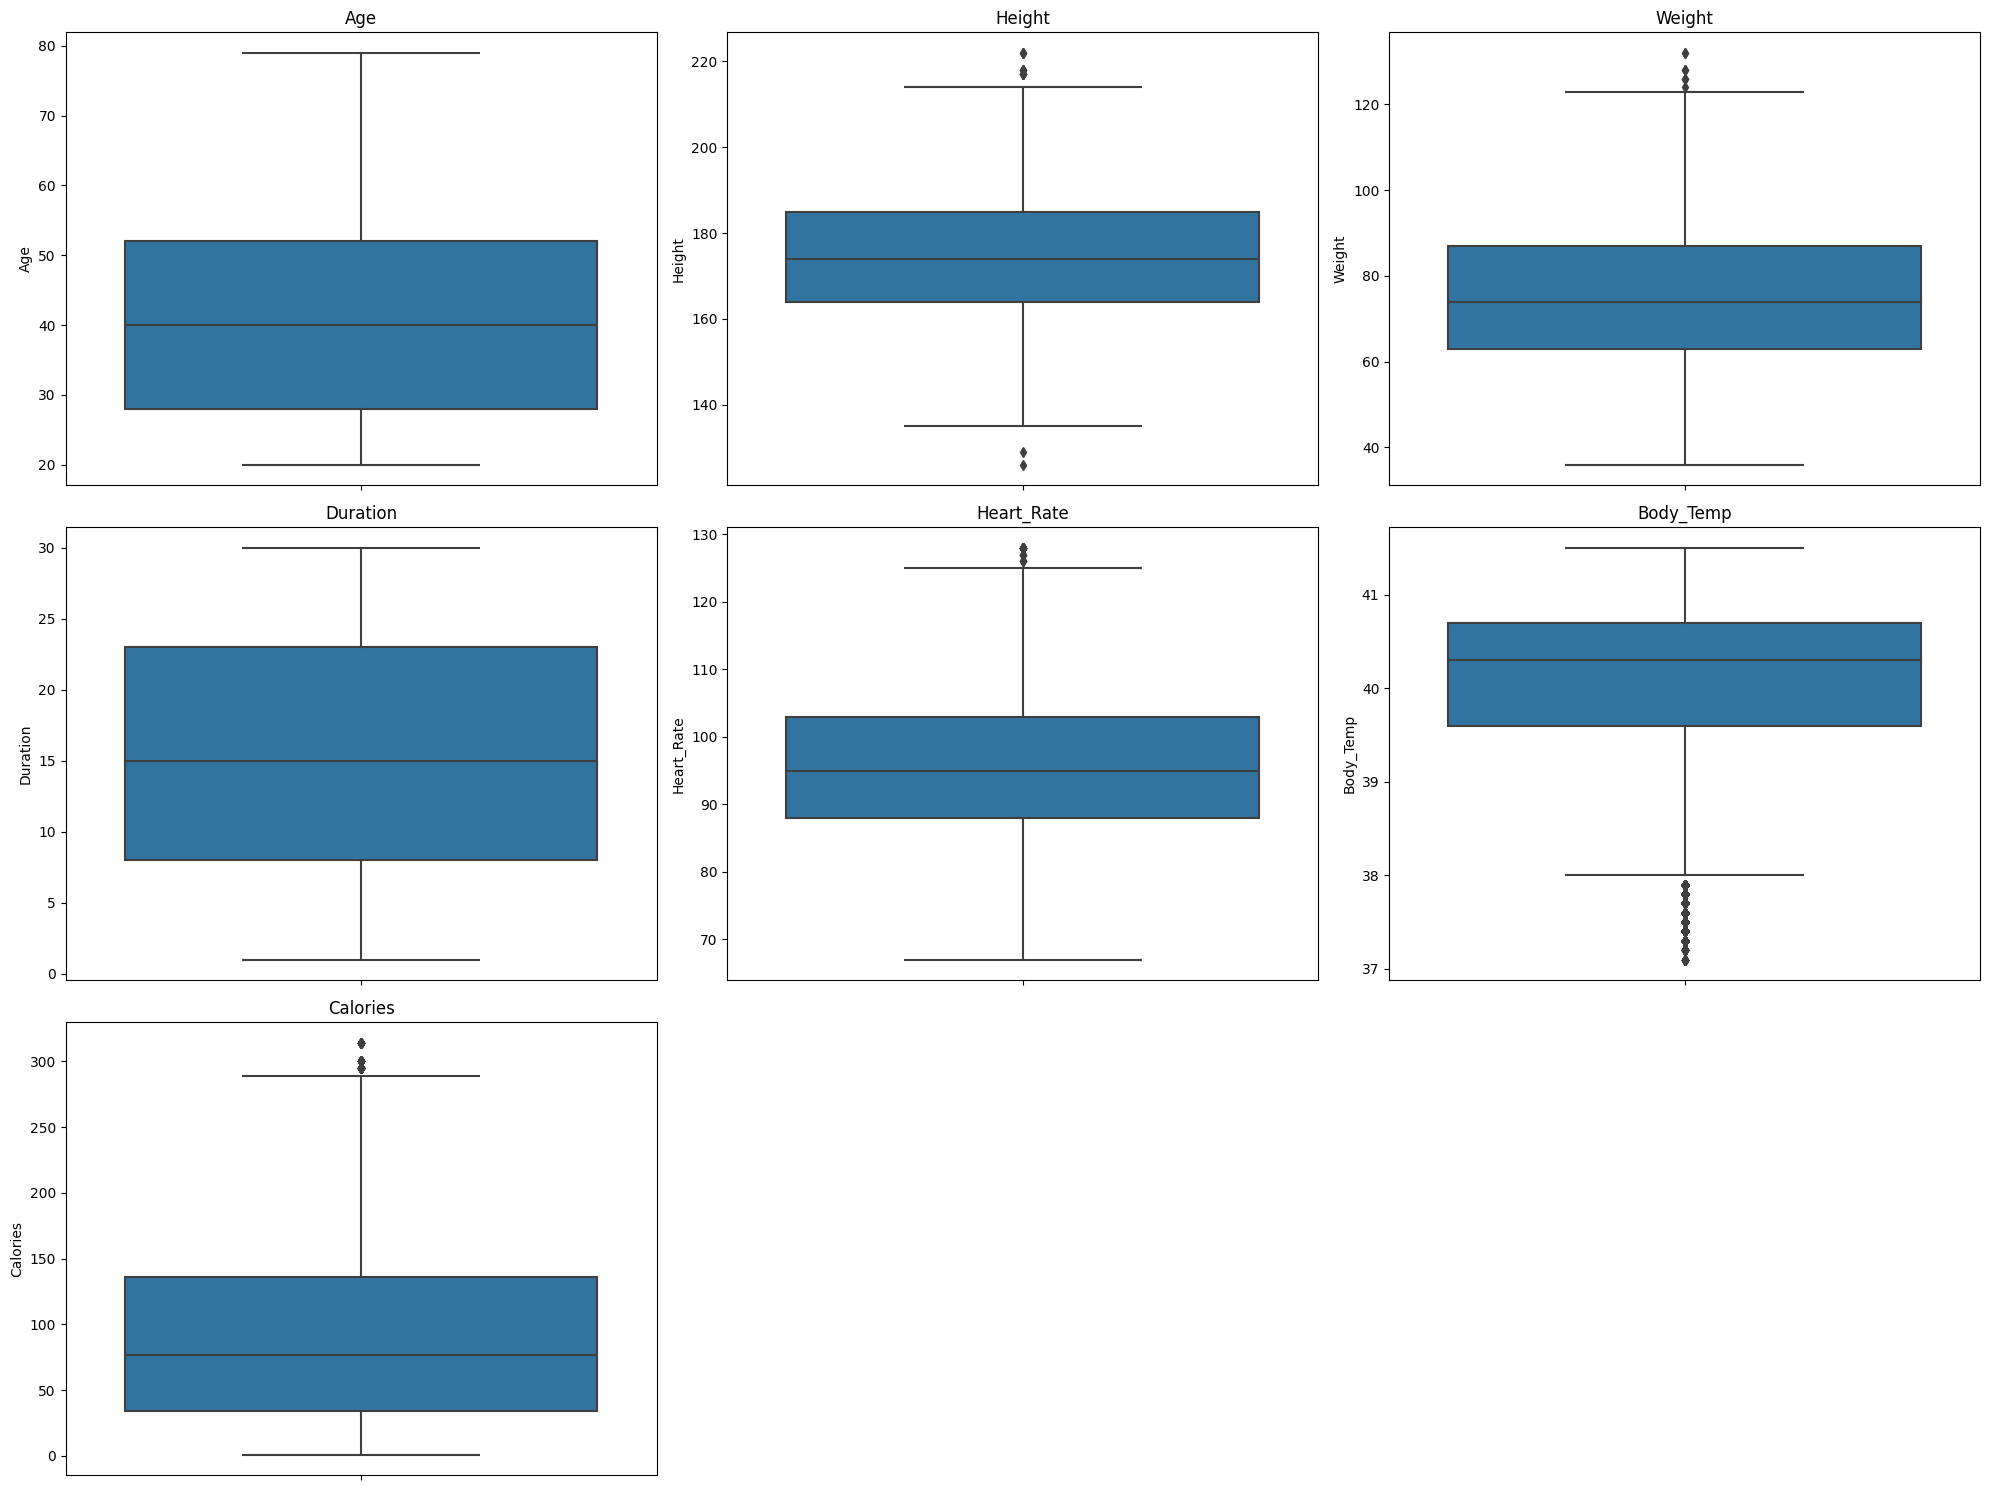

In [10]:
#check outliers using boxplots
plt.figure(figsize=(20, 15))
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df[feature])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

**Let's do some feature engineering**

In [11]:
df_train_pre = train_df.copy()

#BMI is derived from weight and height. kg/m
df_train_pre['BMI'] = df_train_pre['Weight']/((df_train_pre['Height']/100)**2)

#encode Sex to numeric.
df_train_pre['Sex'] = df_train_pre['Sex'].map({'female': 0, 'male': 1})

#some new features
df_train_pre['Duration_HeartRate'] = df_train_pre['Duration']*df_train_pre['Heart_Rate']
df_train_pre['Duration_BodyTemp'] = df_train_pre['Duration']*df_train_pre['Body_Temp']
df_train_pre['Heart_BodyTemp'] = df_train_pre['Heart_Rate']*df_train_pre['Body_Temp']

#create some polynomials for key predictors

df_train_pre['Duration_squared'] = df_train_pre['Duration']**2
df_train_pre['BodyTemp_squared'] = df_train_pre['Body_Temp']**2
df_train_pre['HeartRate_squared'] = df_train_pre['Heart_Rate']**2

#standarize our numerical features
from sklearn.preprocessing import StandardScaler

feature_col = [col for col in df_train_pre.columns if col not in ['Sex', 'id', 'Calories']]

scaler = StandardScaler()
df_train_pre[feature_col] = scaler.fit_transform(df_train_pre[feature_col])

**train/test split and modelling**

In [12]:
from sklearn.model_selection import train_test_split

X = df_train_pre.drop(['id', 'Calories'], axis=1)
y = df_train_pre['Calories']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
print(f'Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}')

Training set shape: (600000, 14), Validation set shape: (150000, 14)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_val, y_train, y_val):
    #train / predict 
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    #eva. metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    train_r2 = r2_score(y_train, y_pred_train)
    val_r2 = r2_score(y_val, y_pred_val)

    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Validation R²: {val_r2:.4f}")

    return val_rmse, model, y_pred_val

Let's try a linear regression model

In [14]:
from sklearn.linear_model import LinearRegression

print("Training Linear Regression Model:")
lr = LinearRegression()
lr_rmse, lr_model, lr_pred = evaluate_model(lr, X_train, X_val, y_train, y_val)

Training Linear Regression Model:
Training RMSE: 7.7769
Validation RMSE: 7.7511
Training R²: 0.9845
Validation R²: 0.9845


**Gradient boosting Models**

In [15]:
import lightgbm as lgb

print("Training LGBM Model:")
lgbmodel = lgb.LGBMRegressor(n_estimators=200, random_state=42)
lgb_rmse, lgb_model, lgb_pred = evaluate_model(lgbmodel, X_train, X_val, y_train, y_val)

print()

import xgboost as xgb
print("Training XGBOOST Model:")
xgbmodel = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_rmse, xgb_model, xgb_pred = evaluate_model(xgbmodel, X_train, X_val, y_train, y_val)

Training LGBM Model:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 14
[LightGBM] [Info] Start training from score 88.298465
Training RMSE: 3.5654
Validation RMSE: 3.6774
Training R²: 0.9967
Validation R²: 0.9965

Training XGBOOST Model:
Training RMSE: 3.3307
Validation RMSE: 3.7313
Training R²: 0.9972
Validation R²: 0.9964


**Both models work pretty good.
  Let's try even optimize it using bayesian optimization
**

In [16]:
import optuna
from sklearn.model_selection import cross_val_score

def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200)
    }

    model = lgb.LGBMRegressor(**param, random_state=42)
    score = -cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
    ).mean()

    return score      


def objective_xgb(trial):
    param = {  # Fixed indentation here (4 spaces instead of 5)
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200)
    }
    
    model = xgb.XGBRegressor(**param, random_state=42)
    score = -cross_val_score(
        model, 
        X_train,
        y_train, 
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    ).mean()
    return score

In [17]:
print("Bayesian Optimization For LightGBM:")
lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective_lgb, n_trials=20)

print(f'Best Params:\n{lgb_study.best_params}')
print(f'Best RMSE:\n{lgb_study.best_value}')

[I 2025-08-13 20:09:49,673] A new study created in memory with name: no-name-e6ac7c54-0212-4b85-9208-14c762ebf6c8


Bayesian Optimization For LightGBM:


[I 2025-08-13 20:10:12,988] Trial 0 finished with value: 3.74893991192731 and parameters: {'num_leaves': 81, 'learning_rate': 0.09646925491184649, 'feature_fraction': 0.747957010971472, 'bagging_fraction': 0.9044032122421906, 'min_child_samples': 56, 'lambda_l1': 1.3562863425351265e-05, 'lambda_l2': 9.011280189377242e-08, 'n_estimators': 60}. Best is trial 0 with value: 3.74893991192731.
[I 2025-08-13 20:10:25,022] Trial 1 finished with value: 3.9408929633641763 and parameters: {'num_leaves': 30, 'learning_rate': 0.09133115580089357, 'feature_fraction': 0.6309224489534024, 'bagging_fraction': 0.8016619884423971, 'min_child_samples': 30, 'lambda_l1': 0.0005724158113475066, 'lambda_l2': 1.4293089651239609e-08, 'n_estimators': 66}. Best is trial 0 with value: 3.74893991192731.


[LightGBM] [Warning] feature_fraction is set=0.747957010971472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747957010971472
[LightGBM] [Warning] lambda_l2 is set=9.011280189377242e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.011280189377242e-08
[LightGBM] [Warning] lambda_l1 is set=1.3562863425351265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3562863425351265e-05
[LightGBM] [Warning] bagging_fraction is set=0.9044032122421906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9044032122421906
[LightGBM] [Warning] feature_fraction is set=0.747957010971472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747957010971472
[LightGBM] [Warning] lambda_l2 is set=9.011280189377242e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.011280189377242e-08
[LightGBM] [Warning] lambda_l1 is set=1.3562863425351265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.35628634

[I 2025-08-13 20:10:49,674] Trial 2 finished with value: 12.518096963578921 and parameters: {'num_leaves': 43, 'learning_rate': 0.01831325632465858, 'feature_fraction': 0.8904098007084269, 'bagging_fraction': 0.6413650204115009, 'min_child_samples': 52, 'lambda_l1': 1.4703778337667803, 'lambda_l2': 0.026126468768821833, 'n_estimators': 94}. Best is trial 0 with value: 3.74893991192731.


[LightGBM] [Warning] feature_fraction is set=0.747957010971472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747957010971472
[LightGBM] [Warning] lambda_l2 is set=9.011280189377242e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.011280189377242e-08
[LightGBM] [Warning] lambda_l1 is set=1.3562863425351265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3562863425351265e-05
[LightGBM] [Warning] bagging_fraction is set=0.9044032122421906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9044032122421906
[LightGBM] [Warning] feature_fraction is set=0.747957010971472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747957010971472
[LightGBM] [Warning] lambda_l2 is set=9.011280189377242e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.011280189377242e-08
[LightGBM] [Warning] lambda_l1 is set=1.3562863425351265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.35628634

[I 2025-08-13 20:11:06,582] Trial 3 finished with value: 3.732676945889677 and parameters: {'num_leaves': 73, 'learning_rate': 0.11212344729608027, 'feature_fraction': 0.7262524527137149, 'bagging_fraction': 0.9178951820005642, 'min_child_samples': 57, 'lambda_l1': 1.6184977946209598e-05, 'lambda_l2': 6.539544855561858e-08, 'n_estimators': 62}. Best is trial 3 with value: 3.732676945889677.
[I 2025-08-13 20:11:28,520] Trial 4 finished with value: 3.7530924574845153 and parameters: {'num_leaves': 52, 'learning_rate': 0.27753404855631275, 'feature_fraction': 0.54431029761787, 'bagging_fraction': 0.8211418665787054, 'min_child_samples': 51, 'lambda_l1': 1.196608623364882e-06, 'lambda_l2': 3.21262564381849e-05, 'n_estimators': 67}. Best is trial 3 with value: 3.732676945889677.



[LightGBM] [Warning] feature_fraction is set=0.7262524527137149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262524527137149
[LightGBM] [Warning] lambda_l2 is set=6.539544855561858e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.539544855561858e-08
[LightGBM] [Warning] lambda_l1 is set=1.6184977946209598e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6184977946209598e-05
[LightGBM] [Warning] bagging_fraction is set=0.9178951820005642, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9178951820005642
[LightGBM] [Warning] feature_fraction is set=0.7262524527137149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262524527137149
[LightGBM] [Warning] lambda_l2 is set=6.539544855561858e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.539544855561858e-08
[LightGBM] [Warning] lambda_l1 is set=1.6184977946209598e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.618

[I 2025-08-13 20:11:47,497] Trial 5 finished with value: 3.7246686422580724 and parameters: {'num_leaves': 36, 'learning_rate': 0.1578012604662855, 'feature_fraction': 0.5122529621923642, 'bagging_fraction': 0.5057841682172519, 'min_child_samples': 12, 'lambda_l1': 2.5491992266993333e-07, 'lambda_l2': 1.1764592438604554e-07, 'n_estimators': 115}. Best is trial 5 with value: 3.7246686422580724.



[LightGBM] [Warning] feature_fraction is set=0.7262524527137149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262524527137149
[LightGBM] [Warning] lambda_l2 is set=6.539544855561858e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.539544855561858e-08
[LightGBM] [Warning] lambda_l1 is set=1.6184977946209598e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6184977946209598e-05
[LightGBM] [Warning] bagging_fraction is set=0.9178951820005642, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9178951820005642
[LightGBM] [Warning] feature_fraction is set=0.7262524527137149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262524527137149
[LightGBM] [Warning] lambda_l2 is set=6.539544855561858e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.539544855561858e-08
[LightGBM] [Warning] lambda_l1 is set=1.6184977946209598e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.618

[I 2025-08-13 20:12:14,098] Trial 6 finished with value: 3.69049211668122 and parameters: {'num_leaves': 101, 'learning_rate': 0.22281511073686958, 'feature_fraction': 0.7800259380998483, 'bagging_fraction': 0.7477289493975323, 'min_child_samples': 68, 'lambda_l1': 2.8747224883095525e-06, 'lambda_l2': 0.008289202827828756, 'n_estimators': 134}. Best is trial 6 with value: 3.69049211668122.



[LightGBM] [Warning] feature_fraction is set=0.7800259380998483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7800259380998483
[LightGBM] [Warning] lambda_l2 is set=0.008289202827828756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008289202827828756
[LightGBM] [Warning] lambda_l1 is set=2.8747224883095525e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8747224883095525e-06
[LightGBM] [Warning] bagging_fraction is set=0.7477289493975323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7477289493975323
[LightGBM] [Warning] feature_fraction is set=0.7800259380998483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7800259380998483
[LightGBM] [Warning] lambda_l2 is set=0.008289202827828756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008289202827828756
[LightGBM] [Warning] lambda_l1 is set=2.8747224883095525e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8747224

[I 2025-08-13 20:12:35,284] Trial 7 finished with value: 3.783315468336338 and parameters: {'num_leaves': 29, 'learning_rate': 0.11177195843653125, 'feature_fraction': 0.7856753299180503, 'bagging_fraction': 0.7987861621443985, 'min_child_samples': 43, 'lambda_l1': 0.0037037535330990507, 'lambda_l2': 0.001245080568979619, 'n_estimators': 99}. Best is trial 6 with value: 3.69049211668122.
[I 2025-08-13 20:13:07,721] Trial 8 finished with value: 3.6386496151902072 and parameters: {'num_leaves': 77, 'learning_rate': 0.11688633188585809, 'feature_fraction': 0.5340467123796413, 'bagging_fraction': 0.6519100291206441, 'min_child_samples': 81, 'lambda_l1': 9.330962955875929, 'lambda_l2': 3.890126316818152e-05, 'n_estimators': 186}. Best is trial 8 with value: 3.6386496151902072.



[LightGBM] [Warning] feature_fraction is set=0.7856753299180503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7856753299180503
[LightGBM] [Warning] lambda_l2 is set=0.001245080568979619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001245080568979619
[LightGBM] [Warning] lambda_l1 is set=0.0037037535330990507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037037535330990507
[LightGBM] [Warning] bagging_fraction is set=0.7987861621443985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7987861621443985
[LightGBM] [Warning] feature_fraction is set=0.7856753299180503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7856753299180503
[LightGBM] [Warning] lambda_l2 is set=0.001245080568979619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001245080568979619
[LightGBM] [Warning] lambda_l1 is set=0.0037037535330990507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037037535

[I 2025-08-13 20:13:29,438] Trial 9 finished with value: 3.738784458825839 and parameters: {'num_leaves': 51, 'learning_rate': 0.2308367721283703, 'feature_fraction': 0.6847920228521903, 'bagging_fraction': 0.8549391591437575, 'min_child_samples': 64, 'lambda_l1': 1.3799235400506389, 'lambda_l2': 0.038931515945000064, 'n_estimators': 123}. Best is trial 8 with value: 3.6386496151902072.



[LightGBM] [Warning] feature_fraction is set=0.5340467123796413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5340467123796413
[LightGBM] [Warning] lambda_l2 is set=3.890126316818152e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.890126316818152e-05
[LightGBM] [Warning] lambda_l1 is set=9.330962955875929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.330962955875929
[LightGBM] [Warning] bagging_fraction is set=0.6519100291206441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6519100291206441
[LightGBM] [Warning] feature_fraction is set=0.5340467123796413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5340467123796413
[LightGBM] [Warning] lambda_l2 is set=3.890126316818152e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.890126316818152e-05
[LightGBM] [Warning] lambda_l1 is set=9.330962955875929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.330962955875929
[L

[I 2025-08-13 20:14:46,937] Trial 10 finished with value: 9.180330824863848 and parameters: {'num_leaves': 148, 'learning_rate': 0.010217955437287013, 'feature_fraction': 0.9847868711224768, 'bagging_fraction': 0.6547703568605491, 'min_child_samples': 96, 'lambda_l1': 0.02281709105591959, 'lambda_l2': 2.1119075335809147e-05, 'n_estimators': 200}. Best is trial 8 with value: 3.6386496151902072.
[I 2025-08-13 20:15:20,400] Trial 11 finished with value: 3.668474680473673 and parameters: {'num_leaves': 115, 'learning_rate': 0.196523265418256, 'feature_fraction': 0.8347411244728281, 'bagging_fraction': 0.673897635330002, 'min_child_samples': 83, 'lambda_l1': 3.613167970429181e-08, 'lambda_l2': 0.4668047385823751, 'n_estimators': 164}. Best is trial 8 with value: 3.6386496151902072.



[LightGBM] [Warning] feature_fraction is set=0.9847868711224768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9847868711224768
[LightGBM] [Warning] lambda_l2 is set=2.1119075335809147e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1119075335809147e-05
[LightGBM] [Warning] lambda_l1 is set=0.02281709105591959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02281709105591959
[LightGBM] [Warning] bagging_fraction is set=0.6547703568605491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6547703568605491
[LightGBM] [Warning] feature_fraction is set=0.9847868711224768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9847868711224768
[LightGBM] [Warning] lambda_l2 is set=2.1119075335809147e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1119075335809147e-05
[LightGBM] [Warning] lambda_l1 is set=0.02281709105591959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02281709

[I 2025-08-13 20:16:06,422] Trial 12 finished with value: 3.6558034456284503 and parameters: {'num_leaves': 118, 'learning_rate': 0.17013390023895483, 'feature_fraction': 0.869840531992882, 'bagging_fraction': 0.6588873115741078, 'min_child_samples': 85, 'lambda_l1': 4.9702634964858785e-08, 'lambda_l2': 1.3526156995347938, 'n_estimators': 178}. Best is trial 8 with value: 3.6386496151902072.



[LightGBM] [Warning] feature_fraction is set=0.9847868711224768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9847868711224768
[LightGBM] [Warning] lambda_l2 is set=2.1119075335809147e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1119075335809147e-05
[LightGBM] [Warning] lambda_l1 is set=0.02281709105591959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02281709105591959
[LightGBM] [Warning] bagging_fraction is set=0.6547703568605491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6547703568605491
[LightGBM] [Warning] feature_fraction is set=0.9847868711224768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9847868711224768
[LightGBM] [Warning] lambda_l2 is set=2.1119075335809147e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1119075335809147e-05
[LightGBM] [Warning] lambda_l1 is set=0.02281709105591959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02281709

[I 2025-08-13 20:16:47,122] Trial 13 finished with value: 3.6510231416450836 and parameters: {'num_leaves': 128, 'learning_rate': 0.16709345287095445, 'feature_fraction': 0.9443971094956212, 'bagging_fraction': 0.5502442336928914, 'min_child_samples': 83, 'lambda_l1': 0.16022683616990152, 'lambda_l2': 2.5781311900919257, 'n_estimators': 196}. Best is trial 8 with value: 3.6386496151902072.



[LightGBM] [Warning] bagging_fraction is set=0.6547703568605491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6547703568605491
[LightGBM] [Warning] feature_fraction is set=0.8347411244728281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8347411244728281
[LightGBM] [Warning] lambda_l2 is set=0.4668047385823751, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4668047385823751
[LightGBM] [Warning] lambda_l1 is set=3.613167970429181e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.613167970429181e-08
[LightGBM] [Warning] bagging_fraction is set=0.673897635330002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.673897635330002
[LightGBM] [Warning] feature_fraction is set=0.8347411244728281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8347411244728281
[LightGBM] [Warning] lambda_l2 is set=0.4668047385823751, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.466804738

[I 2025-08-13 20:17:35,344] Trial 14 finished with value: 3.6202010128289137 and parameters: {'num_leaves': 145, 'learning_rate': 0.06327461831468838, 'feature_fraction': 0.605098840201011, 'bagging_fraction': 0.5190980903600148, 'min_child_samples': 100, 'lambda_l1': 8.904610072959619, 'lambda_l2': 7.830599192285531, 'n_estimators': 198}. Best is trial 14 with value: 3.6202010128289137.



[LightGBM] [Warning] feature_fraction is set=0.869840531992882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.869840531992882
[LightGBM] [Warning] lambda_l2 is set=1.3526156995347938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3526156995347938
[LightGBM] [Warning] lambda_l1 is set=4.9702634964858785e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9702634964858785e-08
[LightGBM] [Warning] bagging_fraction is set=0.6588873115741078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6588873115741078
[LightGBM] [Warning] feature_fraction is set=0.869840531992882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.869840531992882
[LightGBM] [Warning] lambda_l2 is set=1.3526156995347938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3526156995347938
[LightGBM] [Warning] lambda_l1 is set=4.9702634964858785e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9702634964858785e-0

[I 2025-08-13 20:18:07,973] Trial 15 finished with value: 3.677718786238129 and parameters: {'num_leaves': 69, 'learning_rate': 0.05311187621378993, 'feature_fraction': 0.5805609614236538, 'bagging_fraction': 0.576303054936943, 'min_child_samples': 100, 'lambda_l1': 9.942159902704379, 'lambda_l2': 3.8032084464402494e-06, 'n_estimators': 153}. Best is trial 14 with value: 3.6202010128289137.



[LightGBM] [Warning] feature_fraction is set=0.605098840201011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.605098840201011
[LightGBM] [Warning] lambda_l2 is set=7.830599192285531, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830599192285531
[LightGBM] [Warning] lambda_l1 is set=8.904610072959619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.904610072959619
[LightGBM] [Warning] bagging_fraction is set=0.5190980903600148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190980903600148
[LightGBM] [Warning] feature_fraction is set=0.605098840201011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.605098840201011
[LightGBM] [Warning] lambda_l2 is set=7.830599192285531, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830599192285531
[LightGBM] [Warning] lambda_l1 is set=8.904610072959619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.904610072959619
[LightGBM] [Warning] b

[I 2025-08-13 20:18:52,679] Trial 16 finished with value: 3.6275814446349957 and parameters: {'num_leaves': 98, 'learning_rate': 0.062215581822205115, 'feature_fraction': 0.6259078403552458, 'bagging_fraction': 0.5897633758099163, 'min_child_samples': 74, 'lambda_l1': 0.07149011834427695, 'lambda_l2': 0.0005628629494058801, 'n_estimators': 179}. Best is trial 14 with value: 3.6202010128289137.



[LightGBM] [Warning] bagging_fraction is set=0.5190980903600148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190980903600148
[LightGBM] [Warning] feature_fraction is set=0.605098840201011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.605098840201011
[LightGBM] [Warning] lambda_l2 is set=7.830599192285531, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830599192285531
[LightGBM] [Warning] lambda_l1 is set=8.904610072959619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.904610072959619
[LightGBM] [Warning] bagging_fraction is set=0.5190980903600148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190980903600148
[LightGBM] [Warning] feature_fraction is set=0.605098840201011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.605098840201011
[LightGBM] [Warning] lambda_l2 is set=7.830599192285531, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.830599192285531
[Light

[I 2025-08-13 20:19:42,073] Trial 17 finished with value: 3.6195977543431903 and parameters: {'num_leaves': 146, 'learning_rate': 0.05128990745354227, 'feature_fraction': 0.647191112351821, 'bagging_fraction': 0.577175803554525, 'min_child_samples': 72, 'lambda_l1': 0.0888500599739899, 'lambda_l2': 0.0008809741372227122, 'n_estimators': 164}. Best is trial 17 with value: 3.6195977543431903.



[LightGBM] [Warning] feature_fraction is set=0.6259078403552458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6259078403552458
[LightGBM] [Warning] lambda_l2 is set=0.0005628629494058801, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005628629494058801
[LightGBM] [Warning] lambda_l1 is set=0.07149011834427695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07149011834427695
[LightGBM] [Warning] bagging_fraction is set=0.5897633758099163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5897633758099163
[LightGBM] [Warning] feature_fraction is set=0.6259078403552458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6259078403552458
[LightGBM] [Warning] lambda_l2 is set=0.0005628629494058801, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005628629494058801
[LightGBM] [Warning] lambda_l1 is set=0.07149011834427695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.071490118344

[I 2025-08-13 20:20:30,206] Trial 18 finished with value: 3.623987783521386 and parameters: {'num_leaves': 148, 'learning_rate': 0.05396624747646572, 'feature_fraction': 0.65296504681253, 'bagging_fraction': 0.5108337002472836, 'min_child_samples': 36, 'lambda_l1': 0.00529528431668059, 'lambda_l2': 8.610428391617662, 'n_estimators': 152}. Best is trial 17 with value: 3.6195977543431903.



[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0888500599739899
[LightGBM] [Warning] bagging_fraction is set=0.577175803554525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577175803554525
[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0888500599739899
[Lig

[I 2025-08-13 20:21:14,291] Trial 19 finished with value: 3.624101012776431 and parameters: {'num_leaves': 136, 'learning_rate': 0.07630431892613027, 'feature_fraction': 0.5816670639357298, 'bagging_fraction': 0.9752468687468208, 'min_child_samples': 92, 'lambda_l1': 0.5744231422528276, 'lambda_l2': 0.16073080510286286, 'n_estimators': 161}. Best is trial 17 with value: 3.6195977543431903.


Best Params:
{'num_leaves': 146, 'learning_rate': 0.05128990745354227, 'feature_fraction': 0.647191112351821, 'bagging_fraction': 0.577175803554525, 'min_child_samples': 72, 'lambda_l1': 0.0888500599739899, 'lambda_l2': 0.0008809741372227122, 'n_estimators': 164}
Best RMSE:
3.6195977543431903


In [18]:
print("Bayesian Optimization for XGBOOST:")
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective_xgb, n_trials=20)

print("\nBest XGBoost parameters:", xgb_study.best_params)
print("Best XGBoost RMSE:", xgb_study.best_value)

[I 2025-08-13 20:21:14,299] A new study created in memory with name: no-name-f92ca3cf-f0e6-4ef7-b9bd-62d9bf9ae2cf


Bayesian Optimization for XGBOOST:


[I 2025-08-13 20:21:21,891] Trial 0 finished with value: 4.6727498219692505 and parameters: {'learning_rate': 0.17470686808456473, 'max_depth': 3, 'min_child_weight': 11, 'subsample': 0.6613775966970203, 'colsample_bytree': 0.788321702153512, 'gamma': 3.021308500299333e-07, 'reg_alpha': 5.406285615485041e-05, 'reg_lambda': 0.8134934416804835, 'n_estimators': 63}. Best is trial 0 with value: 4.6727498219692505.
[I 2025-08-13 20:21:34,740] Trial 1 finished with value: 3.8034336731648914 and parameters: {'learning_rate': 0.2959119897770242, 'max_depth': 7, 'min_child_weight': 18, 'subsample': 0.7161721397588408, 'colsample_bytree': 0.9320466015839834, 'gamma': 7.980321514282687e-06, 'reg_alpha': 0.028897172385683356, 'reg_lambda': 0.06521824611932836, 'n_estimators': 86}. Best is trial 1 with value: 3.8034336731648914.
[I 2025-08-13 20:21:57,132] Trial 2 finished with value: 3.627941636663464 and parameters: {'learning_rate': 0.12795291532186073, 'max_depth': 9, 'min_child_weight': 9, 'su


[LightGBM] [Warning] feature_fraction is set=0.5816670639357298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816670639357298
[LightGBM] [Warning] lambda_l2 is set=0.16073080510286286, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16073080510286286
[LightGBM] [Warning] lambda_l1 is set=0.5744231422528276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5744231422528276
[LightGBM] [Warning] bagging_fraction is set=0.9752468687468208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9752468687468208
[LightGBM] [Warning] feature_fraction is set=0.5816670639357298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816670639357298
[LightGBM] [Warning] lambda_l2 is set=0.16073080510286286, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16073080510286286
[LightGBM] [Warning] lambda_l1 is set=0.5744231422528276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5744231422528276
[Light

[I 2025-08-13 20:26:00,342] Trial 10 finished with value: 5.395378054988134 and parameters: {'learning_rate': 0.01880581150289351, 'max_depth': 9, 'min_child_weight': 16, 'subsample': 0.8845149063111237, 'colsample_bytree': 0.9763414648644421, 'gamma': 0.6472311983088098, 'reg_alpha': 6.378649496471859, 'reg_lambda': 0.001286206309902409, 'n_estimators': 148}. Best is trial 2 with value: 3.627941636663464.
[I 2025-08-13 20:26:23,408] Trial 11 finished with value: 3.6509078145401843 and parameters: {'learning_rate': 0.1206909464767772, 'max_depth': 8, 'min_child_weight': 13, 'subsample': 0.5047706101400833, 'colsample_bytree': 0.8734605968950626, 'gamma': 1.5825084173606445e-05, 'reg_alpha': 8.912939855975768e-07, 'reg_lambda': 5.9378018489257115e-05, 'n_estimators': 137}. Best is trial 2 with value: 3.627941636663464.
[I 2025-08-13 20:26:54,341] Trial 12 finished with value: 3.6926524039596726 and parameters: {'learning_rate': 0.1292145521089914, 'max_depth': 11, 'min_child_weight': 14


Best XGBoost parameters: {'learning_rate': 0.12795291532186073, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.908396954364498, 'colsample_bytree': 0.8718888308510993, 'gamma': 2.0813046600989612e-06, 'reg_alpha': 0.08106060806688409, 'reg_lambda': 0.1051164636278821, 'n_estimators': 115}
Best XGBoost RMSE: 3.627941636663464


**Train optimized models**

In [19]:
print("Training LGBM Model:")
best_lgb = lgb.LGBMRegressor(**lgb_study.best_params, random_state=42)
lgb_rmse, lgb_model, lgb_pred = evaluate_model(best_lgb, X_train, X_val, y_train, y_val)

print()

print("Training XGBOOST Model:")
best_xgb = xgb.XGBRegressor(**xgb_study.best_params, random_state=42)
xgb_rmse, xgb_model, xgb_pred = evaluate_model(best_xgb, X_train, X_val, y_train, y_val)

Training LGBM Model:
[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0888500599739899
[LightGBM] [Warning] bagging_fraction is set=0.577175803554525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577175803554525
[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0

**Model ensembling**

In [20]:
#1- optimal weighting between models
best_rmse = float('inf')
best_weight = 0
weights = np.arange(0.1, 1.01, 0.01)

for weight in weights:
    ensemble_pred = weight*lgb_pred + (1-weight)*xgb_pred
    ensemble_rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))

    if ensemble_rmse < best_rmse:
        best_rmse = ensemble_rmse
        best_weight = weight

ensemble_pred = best_weight*lgb_pred + (1-best_weight)*xgb_pred
ensemble_r2 = r2_score(y_val, ensemble_pred)

print(f"Best weight for LightGBM is: {best_weight:.2f}\nBest weight for XGBoost is: {(1-best_weight):.2f}")
print(f"Weighted ensemble RMSE: {best_rmse:.4f},  R2: {ensemble_r2:.4f}")

Best weight for LightGBM is: 0.61
Best weight for XGBoost is: 0.39
Weighted ensemble RMSE: 3.5780,  R2: 0.9967


In [21]:
#2- stacking folds
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge

def get_oof_predictions(model_constructor, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"  Processing fold {fold+1}/{cv}")
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        
        # Create a new model instance for this fold
        model = model_constructor()
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

print("Generating oof predictions for stacking")

lgb_constructor = lambda: lgb.LGBMRegressor(**lgb_study.best_params, random_state=42)
xgb_constructor = lambda: xgb.XGBRegressor(**xgb_study.best_params, random_state=42)


print("LightGBM:")
lgb_oof = get_oof_predictions(lgb_constructor, X_train, y_train)
print("XGBoost:")
xgb_oof = get_oof_predictions(xgb_constructor, X_train, y_train)

meta_features = np.column_stack([lgb_oof, xgb_oof])
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
grid = GridSearchCV(
    Ridge(),
    {'alpha': alphas},
    cv=5,
    scoring='neg_root_mean_squared_error'
)
grid.fit(meta_features, y_train)
best_alpha = grid.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
meta_model = Ridge(alpha=best_alpha)
meta_model.fit(meta_features, y_train)

print(f"Meta-model coefficients: LightGBM = {meta_model.coef_[0]:.4f}, XGBoost = {meta_model.coef_[1]:.4f}")

meta_features_val = np.column_stack([lgb_pred, xgb_pred])
stacked_pred = meta_model.predict(meta_features_val)
stacked_rmse = np.sqrt(mean_squared_error(y_val, stacked_pred))
stacked_r2 = r2_score(y_val, stacked_pred)

print(f"Stacked ensemble RMSE: {stacked_rmse:.4f}, R²: {stacked_r2:.4f}")

Generating oof predictions for stacking
LightGBM:
  Processing fold 1/5
[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0888500599739899
[LightGBM] [Warning] bagging_fraction is set=0.577175803554525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577175803554525
[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alph

In [22]:
#3- average ensemble
avg_pred = (lgb_pred+xgb_pred)/2
avg_rmse = np.sqrt(mean_squared_error(y_val, avg_pred))
avg_r2 = r2_score(y_val, avg_pred)
print(f"Average: RMSE = {avg_rmse:.4f}, R² = {avg_r2:.4f}")

Average: RMSE = 3.5799, R² = 0.9967


In [23]:
#getting the best method
methods = {
    'average': avg_rmse,
    'weighted': best_rmse,
    'stacked': stacked_rmse
}
best_method = min(methods, key=methods.get)
print(f"Best Method is {best_method} with RMSE {methods[best_method]}")

Best Method is weighted with RMSE 3.5779969676445513


In [24]:
#Generate predictions
test_df = pd.read_csv('/kaggle/input/f-1-racer-diet-planning/test.csv')
id_col = test_df['id'].copy()

#same preprocessing for our test set
df_test_pre = test_df.copy()


df_test_pre['BMI'] = df_test_pre['Weight']/((df_test_pre['Height']/100)**2)

df_test_pre['Sex'] = df_test_pre['Sex'].map({'female': 0, 'male': 1})

df_test_pre['Duration_HeartRate'] = df_test_pre['Duration']*df_test_pre['Heart_Rate']
df_test_pre['Duration_BodyTemp'] = df_test_pre['Duration']*df_test_pre['Body_Temp']
df_test_pre['Heart_BodyTemp'] = df_test_pre['Heart_Rate']*df_test_pre['Body_Temp']

df_test_pre['Duration_squared'] = df_test_pre['Duration']**2
df_test_pre['BodyTemp_squared'] = df_test_pre['Body_Temp']**2
df_test_pre['HeartRate_squared'] = df_test_pre['Heart_Rate']**2

feature_col = [col for col in df_test_pre.columns if col not in ['Sex', 'id']]
df_test_pre[feature_col] = scaler.transform(df_test_pre[feature_col])

X_test = df_test_pre.drop(['id'], axis=1, errors='ignore')

print(f"Test data preprocessed. Shape: {X_test.shape}")

Test data preprocessed. Shape: (250000, 14)


In [25]:
#generate predictions
lgb_test_pred = lgb_model.predict(X_test)
xgb_test_pred = xgb_model.predict(X_test)

if best_method == "average":
    final_pred = (lgb_test_pred + xgb_test_pred) / 2
    method_description = "Simple Average (50/50)"
    
elif best_method == "weighted":
    final_pred = best_weight * lgb_test_pred + (1-best_weight) * xgb_test_pred
    method_description = f"Weighted (LGB: {best_weight:.2f}, XGB: {1-best_weight:.2f})"
    
else:  # stacked
    meta_features_test = np.column_stack([lgb_test_pred, xgb_test_pred])
    final_pred = meta_model.predict(meta_features_test)
    method_description = f"Stacked (LGB: {meta_model.coef_[0]:.4f}, XGB: {meta_model.coef_[1]:.4f})"

print(f"Using {method_description} for final predictions")
print(f"Min predicted calories: {final_pred.min():.2f}")
print(f"Max predicted calories: {final_pred.max():.2f}")
print(f"Mean predicted calories: {final_pred.mean():.2f}")

[LightGBM] [Warning] feature_fraction is set=0.647191112351821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647191112351821
[LightGBM] [Warning] lambda_l2 is set=0.0008809741372227122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008809741372227122
[LightGBM] [Warning] lambda_l1 is set=0.0888500599739899, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0888500599739899
[LightGBM] [Warning] bagging_fraction is set=0.577175803554525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577175803554525
Using Weighted (LGB: 0.61, XGB: 0.39) for final predictions
Min predicted calories: 0.79
Max predicted calories: 301.54
Mean predicted calories: 88.25


In [26]:
submission_df = pd.read_csv('/kaggle/input/f-1-racer-diet-planning/sample_submission.csv')
submission_df['Calories'] = final_pred
submission_df['Calories'] = submission_df['Calories'].clip(0) #no negative pred
submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())

       id    Calories
0  750000   27.409430
1  750001  108.555346
2  750002   87.515830
3  750003  126.408604
4  750004   76.095326


[LightGBM] [Warning] bagging_fraction is set=0.577175803554525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577175803554525
[LightGBM] [Warning] feature_fraction is set=0.65296504681253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65296504681253
[LightGBM] [Warning] lambda_l2 is set=8.610428391617662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.610428391617662
[LightGBM] [Warning] lambda_l1 is set=0.00529528431668059, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00529528431668059
[LightGBM] [Warning] bagging_fraction is set=0.5108337002472836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5108337002472836
[LightGBM] [Warning] feature_fraction is set=0.65296504681253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65296504681253
[LightG